In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


EDA

In [6]:
bins = [45, 60, 100, 140]
labels = ["Low", "Average", "Above Average", "High"]
df['Income Segment'] = pd.qcut(df["Annual Income (k$)"], q=4, labels=labels)

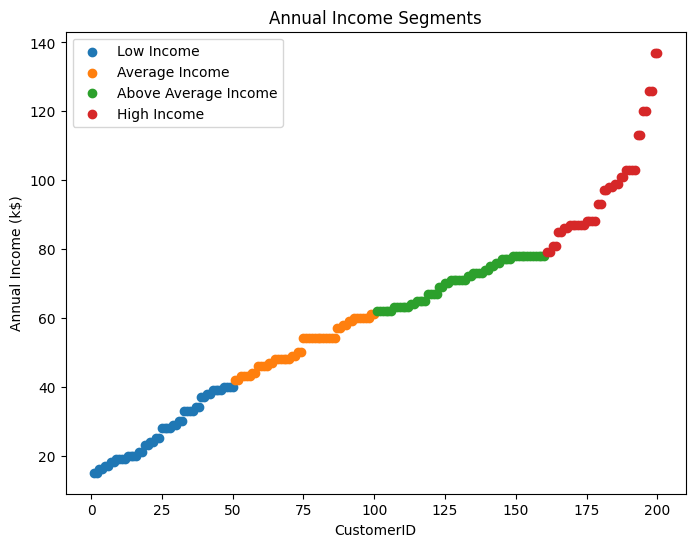

In [7]:
plt.figure(figsize=(8, 6))
for segment in df["Income Segment"].unique():
    segment_data = df[df["Income Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Annual Income (k$)"], label = f"{segment} Income")
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income Segments')
plt.legend()
plt.show()

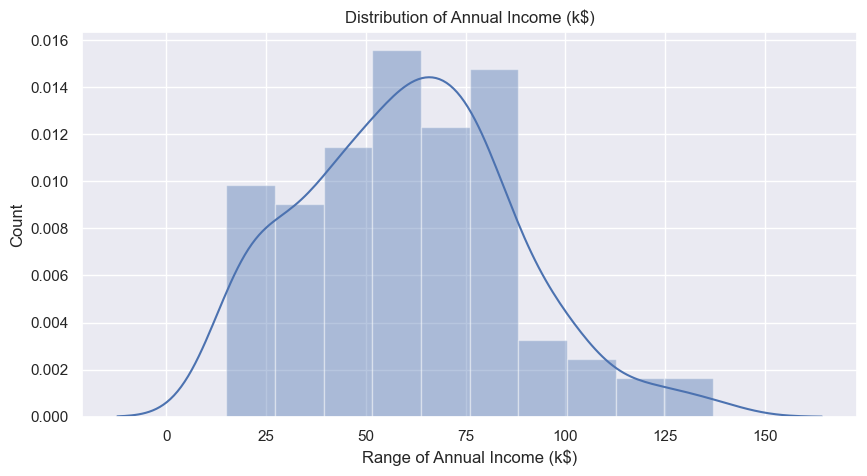

In [8]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

In [9]:
bins = [25, 50, 70, 100]
labels = ["Low", "Average", "Above Average", "High"]
df['Spending Segment'] = pd.qcut(df["Spending Score (1-100)"], q=4, labels=labels)


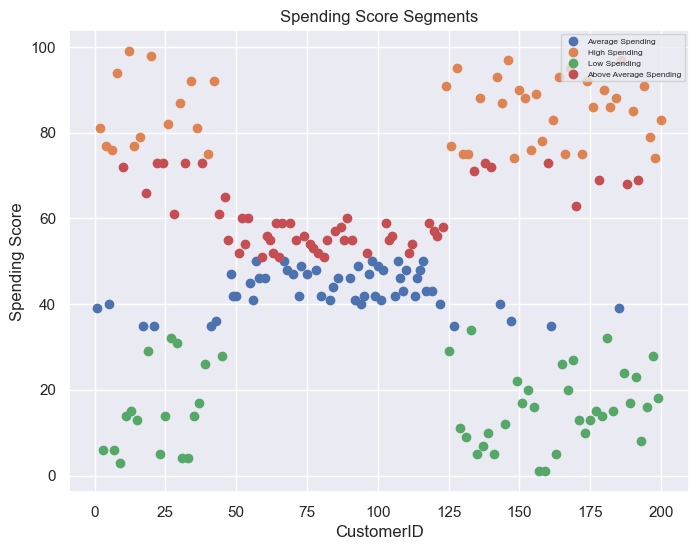

In [10]:
plt.figure(figsize=(8, 6))
for segment in df["Spending Segment"].unique():
    segment_data = df[df["Spending Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Spending Score (1-100)"], label=f"{segment} Spending")

plt.xlabel("CustomerID")
plt.ylabel('Spending Score')
plt.title('Spending Score Segments')
plt.legend(loc="upper right", fontsize=6)
plt.show()

In [11]:
df.drop(['Spending Segment', 'Income Segment'], axis=1, inplace=True)

<Axes: >

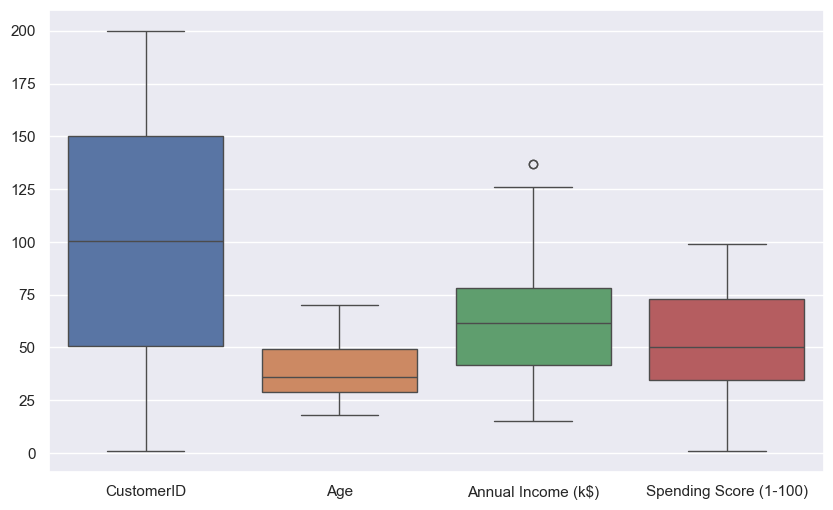

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

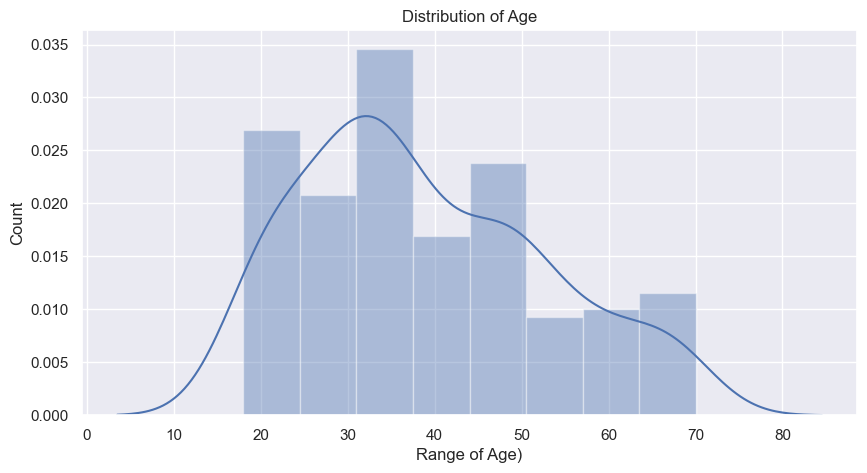

In [13]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age)')
plt.ylabel('Count')
plt.show()

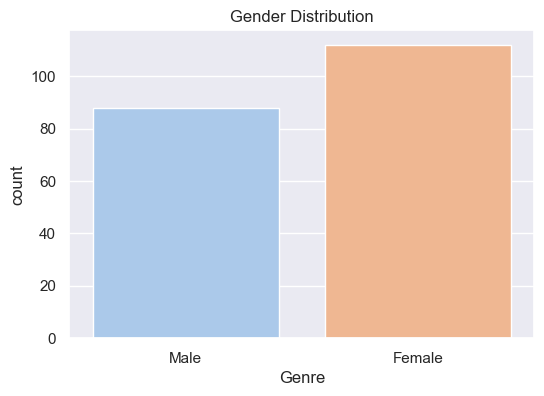

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

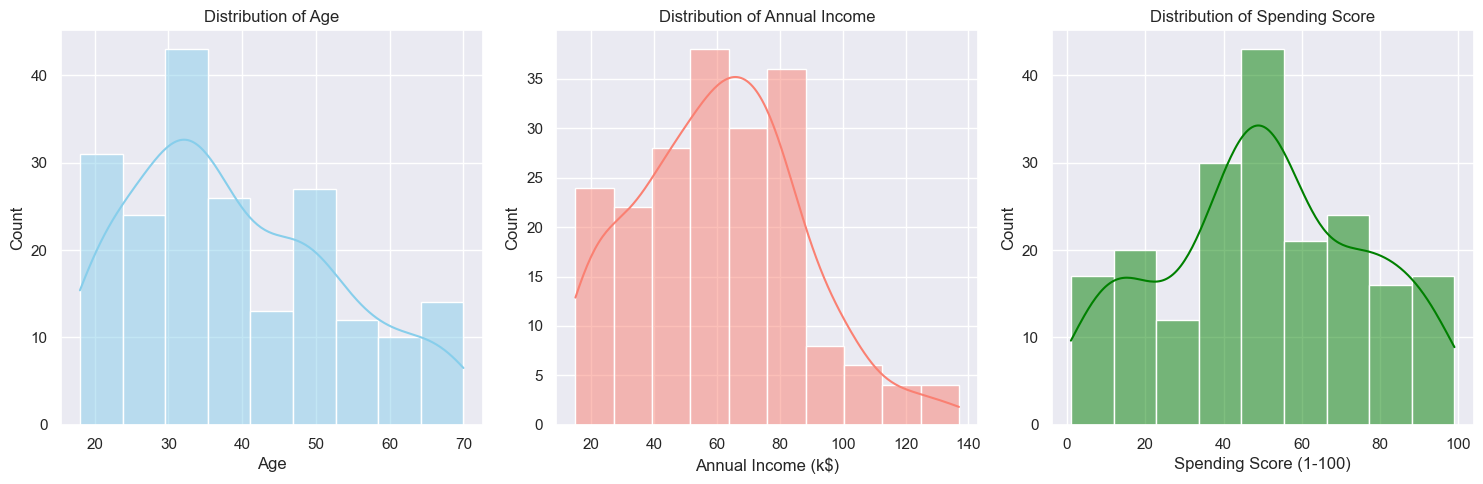

In [15]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

<Figure size 1000x1500 with 0 Axes>

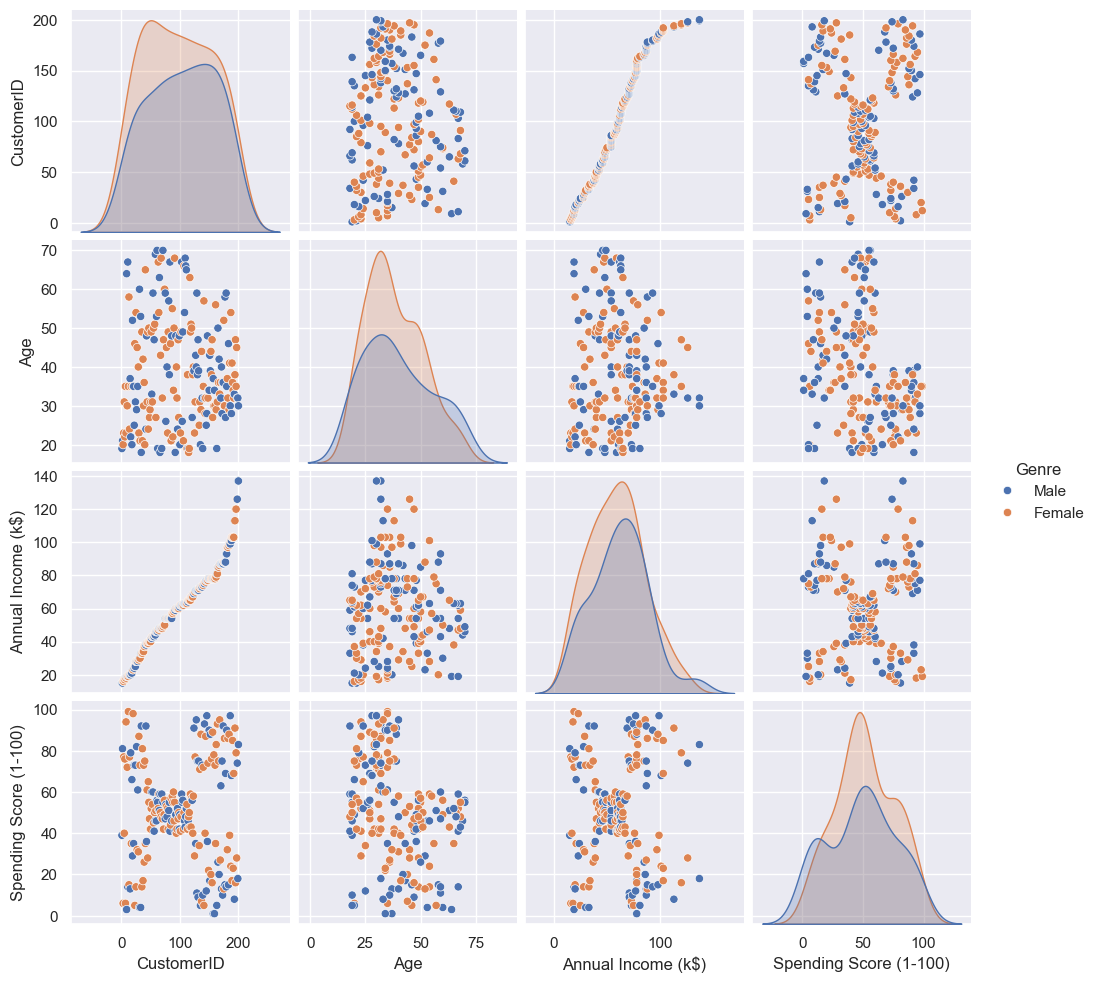

In [16]:
plt.figure(figsize=(10,15))
sns.pairplot(data=df,hue="Genre")
plt.show()

In [17]:
## Scaling important Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])

In [18]:
k_choose = np.arange(2, 13)
k_with_inertia = {}
for k in k_choose:
    k_means = KMeans(n_clusters=k, n_init=10)
    k_means.fit(scaled_features)
    k_with_inertia[k] = k_means.inertia_
k_with_inertia

{np.int64(2): 389.3861889564372,
 np.int64(3): 295.2122461555488,
 np.int64(4): 205.22514747675916,
 np.int64(5): 168.24758017556834,
 np.int64(6): 133.88887021131026,
 np.int64(7): 117.23355393812025,
 np.int64(8): 104.09784107506621,
 np.int64(9): 93.62875005461926,
 np.int64(10): 83.15361500694954,
 np.int64(11): 73.60863334979675,
 np.int64(12): 67.04176841611846}

Plotting the elbow plot

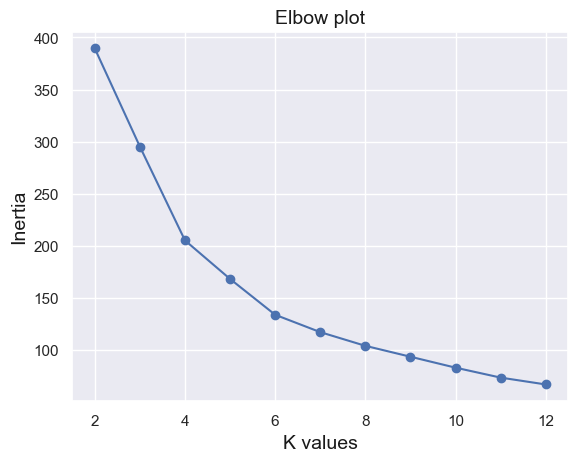

In [19]:
plt.plot(k_with_inertia.keys(), k_with_inertia.values(), "bo-")
plt.title("Elbow plot", fontsize=14, c="k")
plt.xlabel("K values", fontsize=14, c="k")
plt.ylabel("Inertia", fontsize=14, c="k")
plt.show()

Createing the model and adding Clustered classes to data


In [20]:
k_means = KMeans(n_clusters=6, n_init=10, random_state=42)
df['cluster'] = k_means.fit_predict(scaled_features)

In [21]:
predictions = k_means.labels_
predictions

array([4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 1,
       5, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [22]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


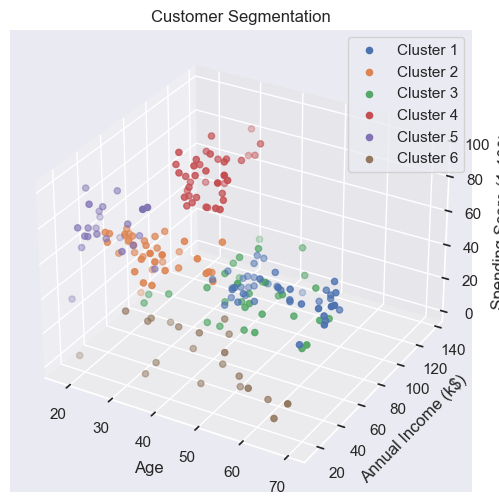

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for i in range(6):
    ax.scatter(df[df['cluster'] == i]['Age'], 
               df[df['cluster'] == i]['Annual Income (k$)'], 
               df[df['cluster'] == i]['Spending Score (1-100)'], 
               label=f'Cluster {i+1}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation')

plt.legend()
plt.show()

In [24]:
from sklearn.cluster import KMeans

# Assuming your data has been loaded into a DataFrame 'df' with the relevant features
# and that these features have been scaled or preprocessed

# Example features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize K-Means
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict clusters
df['cluster'] = kmeans.predict(X)

# Accessing the cluster centers (centroids of each cluster)
print("Cluster Centers:", kmeans.cluster_centers_)

# Accessing the labels (which cluster each data point belongs to)
print("Labels:", kmeans.labels_)


Cluster Centers: [[ 43.93421053  55.21052632  49.44736842]
 [ 32.2        109.7         82.        ]
 [ 24.96        28.04        77.        ]
 [ 40.32432432  87.43243243  18.18918919]
 [ 32.86206897  78.55172414  82.17241379]
 [ 45.2173913   26.30434783  20.91304348]]
Labels: [5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [25]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# To load the saved model later:
loaded_model = joblib.load('kmeans_model.pkl')

# You can now use 'loaded_model' to predict clusters on new data:
new_clusters = loaded_model.predict(new_data)


NameError: name 'new_data' is not defined

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'cluster' is now the label we want to predict
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.3, random_state=42)

# Initialize Logistic Regression
model = LogisticRegression()

# Fit model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset


# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Select relevant features and the target (assuming you have labels for supervised learning)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Feature columns
y = df['cluster']  # Target column (if available)

# Scale the features for better performance with certain models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9928571428571429


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f'Best number of clusters: {best_n_clusters} with silhouette score: {best_score}')


Best number of clusters: 6 with silhouette score: 0.43106526216603014


In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)


In [11]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Accuracy: 0.95


In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validated accuracy scores:", scores)
print("Mean cross-validated accuracy:", scores.mean())

Cross-validated accuracy scores: [1.         1.         1.         1.         0.96428571]
Mean cross-validated accuracy: 0.9928571428571429


In [28]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize multiple models
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm)], voting='hard')

# Fit the model
voting_clf.fit(X_train, y_train)

# Evaluate
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


NameError: name 'RandomForestClassifier' is not defined

User I/P


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your existing DataFrame with the customer data
# Example structure of df:
# CustomerID | Age | Annual Income (k$) | Spending Score (1-100) | cluster

# Features (X) are the 'Age', 'Annual Income', and 'Spending Score'
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Target (y) is the cluster assigned to each customer
y = df['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# User input section
def get_user_input():
    print("\n--- Enter New Customer Details ---")
    age = float(input("Enter age: "))
    income = float(input("Enter annual income (in k$): "))
    spending_score = float(input("Enter spending score (1-100): "))
    
    # Convert the user input into a DataFrame format suitable for prediction
    user_input_data = pd.DataFrame([[age, income, spending_score]],
                                   columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
    
    # Scale the input data using the same scaler used for the training data
    user_input_scaled = scaler.transform(user_input_data)
    
    return user_input_scaled

# Get the user input
user_input = get_user_input()

# Predict the cluster for the new customer
predicted_cluster = model.predict(user_input)
print(f"\nPredicted Cluster for the new customer: {predicted_cluster[0]}")



Accuracy: 0.9666666666666667

--- Enter New Customer Details ---

Predicted Cluster for the new customer: 1
